In [411]:
# OPERATIONAL VERSION BASED ON PREPROCESS.IPYNB

# Libraries

In [412]:
# Libraries
import pytesseract                      # Optical Character Recognition
import cv2                              # Image Modification
import os                               # Directory handling
import pandas as pd                     # Excel sheets
import xlsxwriter                       # Modifying excel sheets
import matplotlib.pyplot as plt         # Displaying images and plots during debugging
import numpy as np                      # Handling arrays
from PIL import Image


# Tesseract Setup
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Elena.Justo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

# Functions

## Image Processing Function Mk1

In [413]:
# Function:    processImage
#    Input:    Path to image to process.
#   Output:    Preprocessed image ready for OCR.

def processImage(imagePath):

    # Get Image
    image = cv2.imread(imagePath)                           # Import image
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)     # Turn it into grayscale

    # Apply Contrast
    alpha = 1.5  
    beta = 10
    contrasted = cv2.convertScaleAbs(imageGray, alpha=alpha, beta=beta) 

    # Bilateral Filter
    filtered = cv2.bilateralFilter(contrasted,9,75,75)

    # Segment the image by appling thresholds
    thresholded = cv2.adaptiveThreshold(filtered,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

    # Remove background
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))   # Make kernel
    morph = cv2.morphologyEx(thresholded, cv2.MORPH_CLOSE, kernel)   # Apply morphology
    
    result = cv2.bitwise_and(contrasted, contrasted, mask=morph)     # Apply mask to image

    return result

## Image Analyser Mk1

In [414]:
def analyseImg(image):
    # Display image
    plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )
    plt.show()

    # Display histogram of image
    histr = cv2.calcHist([image],[0],None,[256],[0,256])
    plt.plot(histr)
    plt.show()

# Zoom Image Mk1

In [428]:
def zoom(img, zoom_factor=2):
    return cv2.resize(img, None, fx=zoom_factor, fy=zoom_factor)

# Figuring Out Nameplate Detection

## Original Image

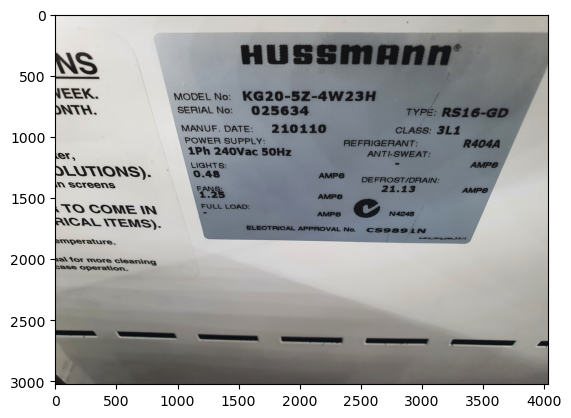

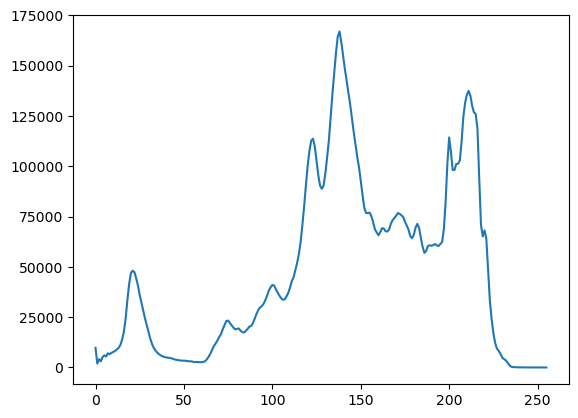

In [463]:
# Get Image
imagePath = r"sites\cessnock\img (2).jpg"
img = cv2.imread(imagePath)                       

# Debug
analyseImg(img)

## Convert image to grayscale


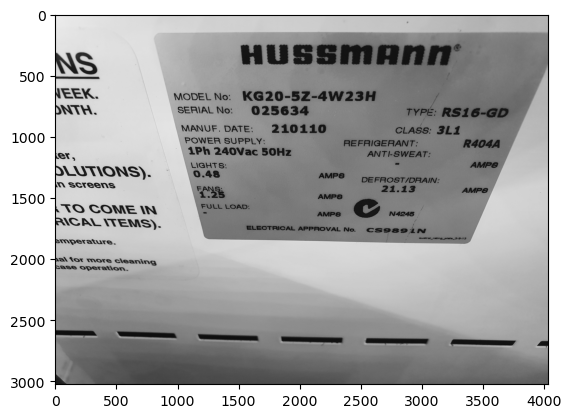

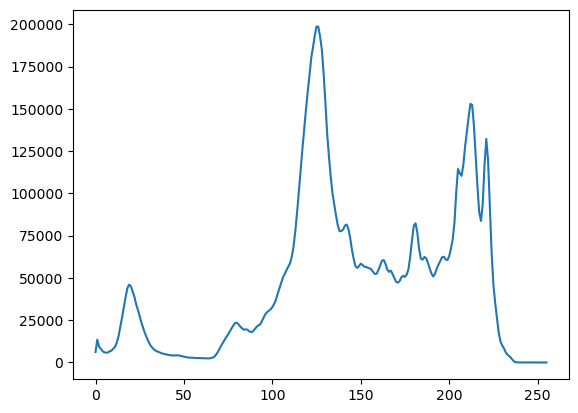

In [464]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Debug
analyseImg(gray)

## Dilate Image to Focus on Nameplate

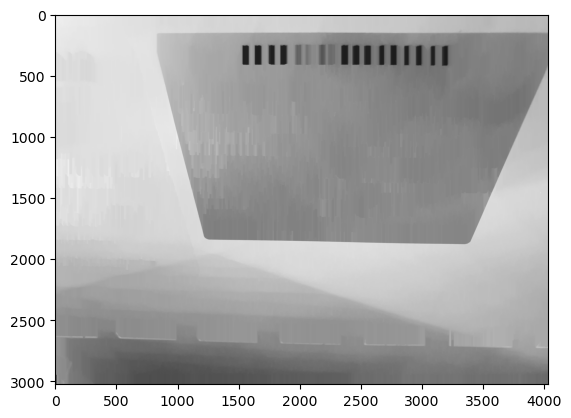

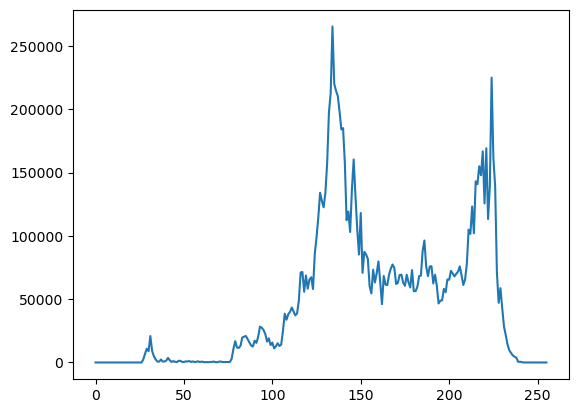

In [465]:
# Close Image
kernel = np.ones((50,5),np.uint8)
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=3)

# Debug
analyseImg(closing)

## Isolate Nameplate

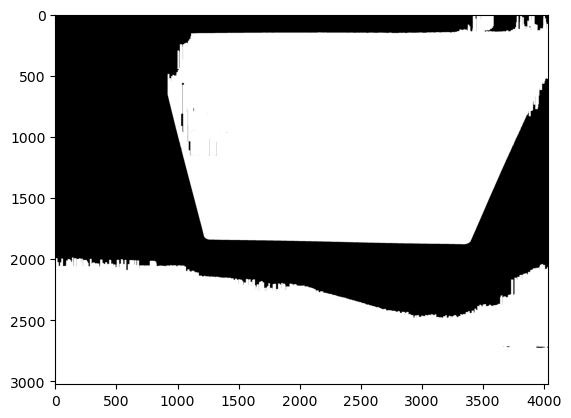

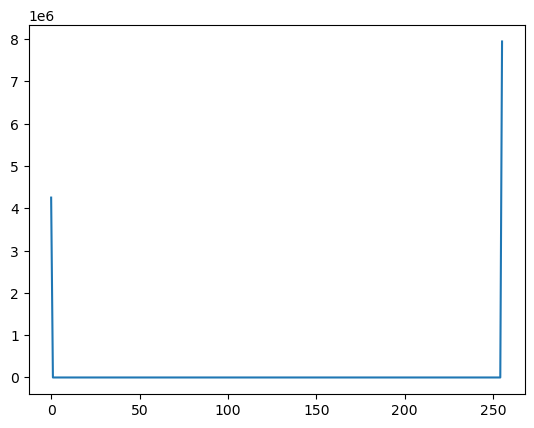

In [466]:
ret,thresh_img = cv2.threshold(closing, 185 , 255, cv2.CHAIN_APPROX_NONE)

analyseImg(thresh_img)

## Draw Contours

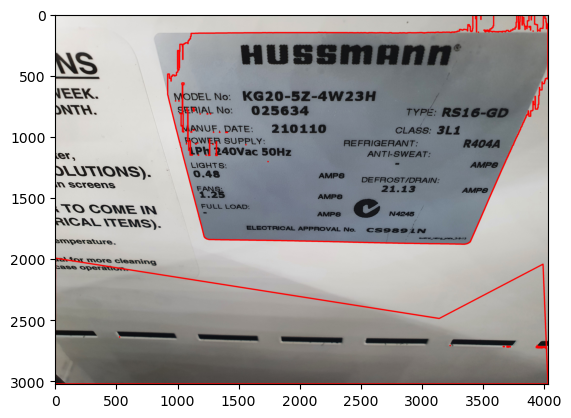

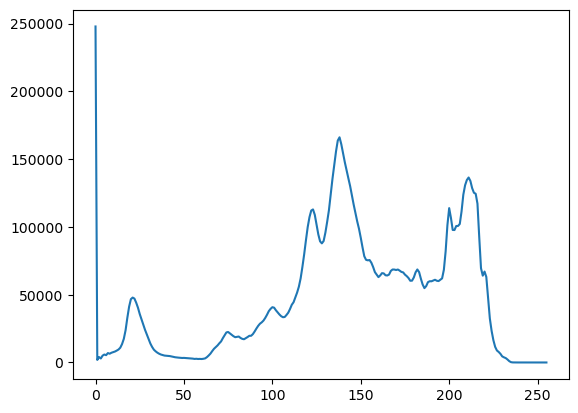

In [460]:
# reading image 
img = img
  
# using a findContours() function 
contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  
i = 0
# list for storing names of shapes 
for contour in contours: 
  
    # here we are ignoring first counter because  
    # findcontour function detects whole image as shape 
    if i == 0: 
        i = 1
        continue
  
    # using drawContours() function 
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 10) 

# displaying the image after drawing contours 
analyseImg(img) 


Pentagon
Circle
Circle
Circle
Circle
Circle
1.0
Square
Circle
1.0
Square
Circle
Circle
1.0
Square
Circle
Circle
Circle
1.0
Square
Pentagon
Pentagon
Circle
Circle
Circle
Circle
Circle
Circle
Circle
Circle
1.0
Square
1.0
Square
1.0
Square
Circle
Circle
Circle
Circle
Circle
1.0
Square
1.0
Square
Circle
Circle


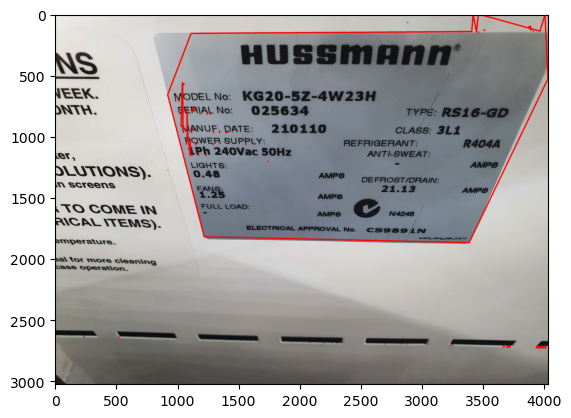

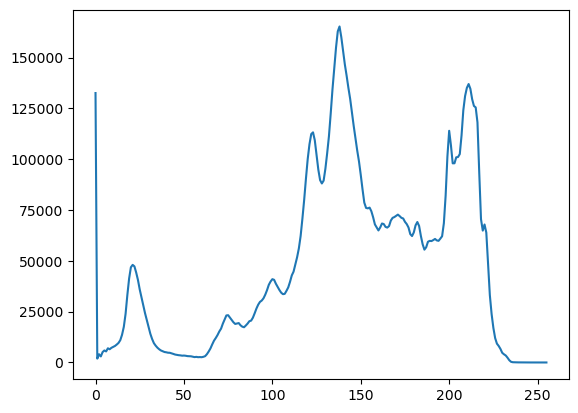

In [471]:
contours , hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)

    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    
    if len(approx) == 3:
        print("Triangle")
    elif len(approx) == 4 :
        x, y , w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        if aspectRatio >= 0.95 and aspectRatio < 1.05:
            print("Square")
        else:
           print("Rectangle")
    elif len(approx) == 5 :
        print("Pentagon")
    elif len(approx) == 10 :
        print("Star")
    else:
        print("Circle")
        cv2.drawContours(img, [approx], 0, (0, 0, 255), 10)
    
analyseImg(img)

# Nameplate Detection Mk1

In [490]:
def detectNameplate(imgPath):
    # Get Image
    img = cv2.imread(imgPath)                       

    # Convert to Greyscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Close Image to Focus on Nameplate
    kernel = np.ones((50,5),np.uint8)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel, iterations=3)
    analyseImg(closing)                                                            

    # Threshold Image to Isolate Nameplate
    ret,thresh_img = cv2.threshold(closing, 185 , 255, cv2.CHAIN_APPROX_NONE)
    analyseImg(thresh_img)

    # using a findContours() function 
    shapes, hierarchy = cv2.findContours(thresh_img, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image=img, contours=shapes, contourIdx=-1, color=(0, 255, 0), thickness=10, lineType=cv2.LINE_AA)

    for iteration, shape in enumerate(shapes):
            if hierarchy[0,iteration,3] == -1:
                    print(hierarchy[0,iteration,3])
                    print(iteration)
    
    return img

## Testing Mk1 on Cessnock

sites/cooma/IMG_6419.JPG


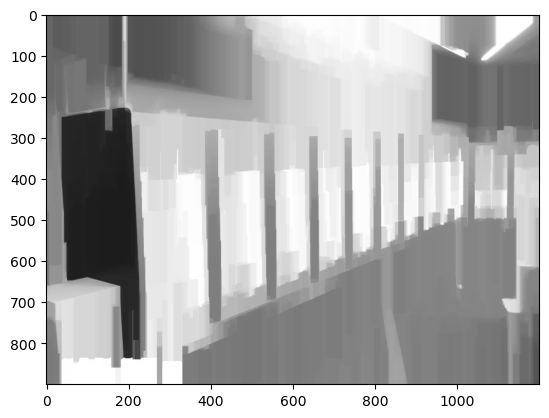

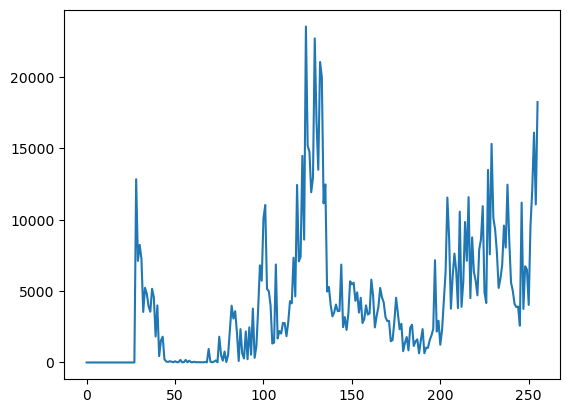

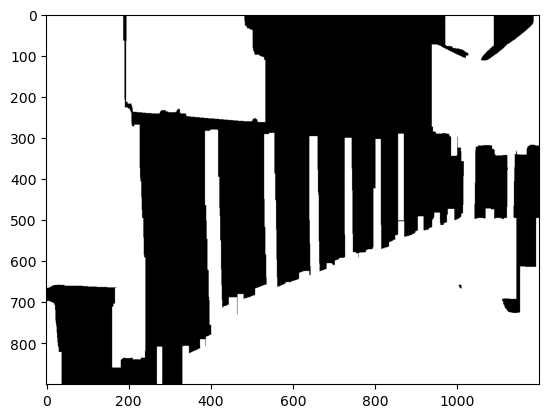

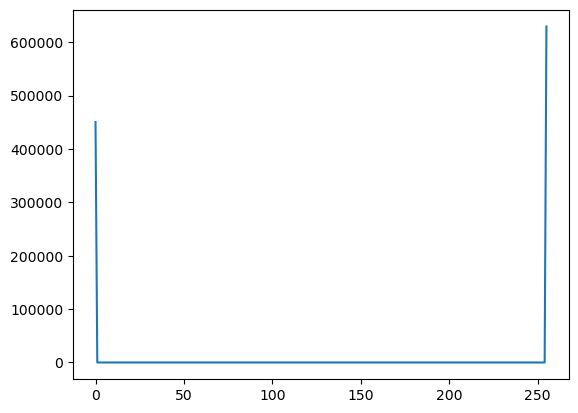

-1
0
-1
1
-1
2
-1
3
-1
4
-1
5


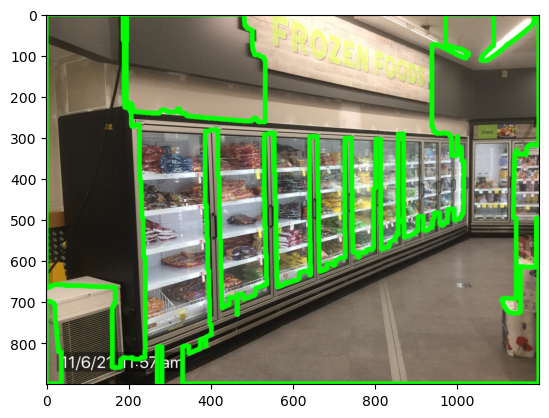

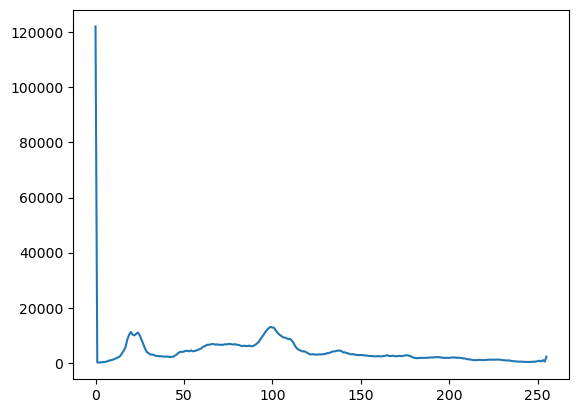

sites/cooma/IMG_6420.JPG


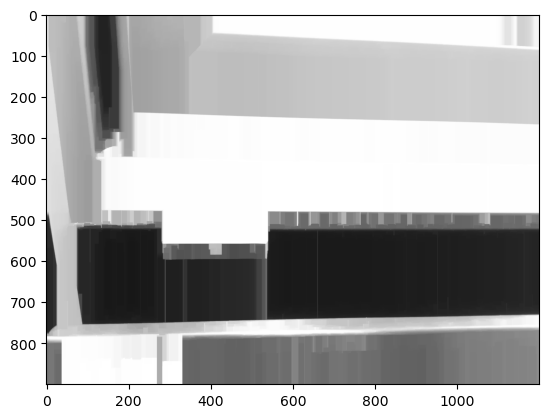

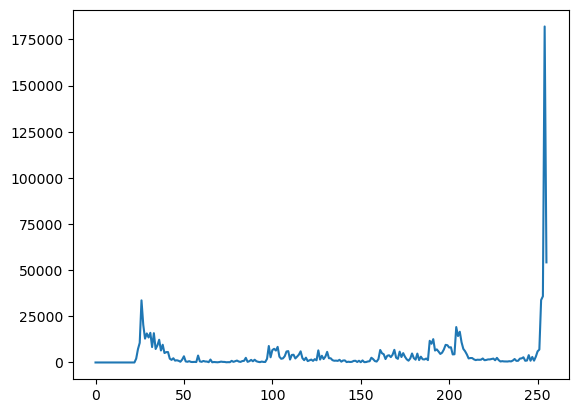

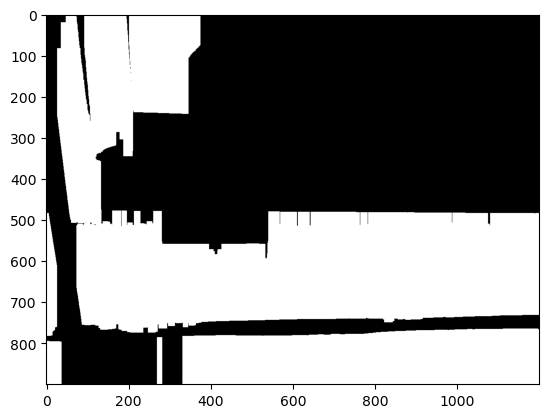

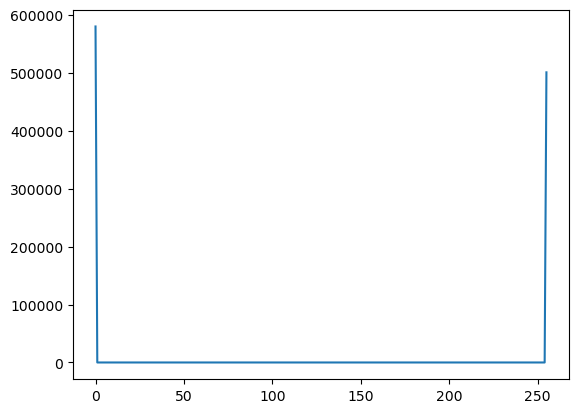

-1
0
-1
1
-1
2
-1
3
-1
4


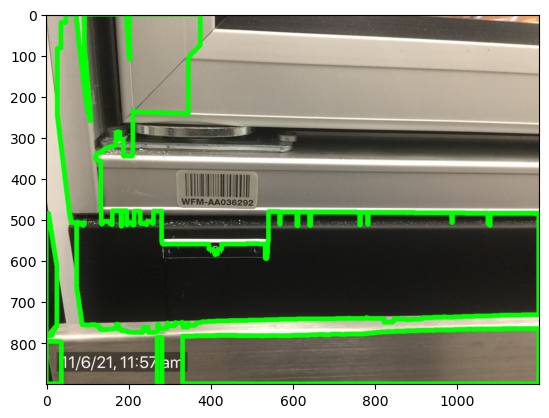

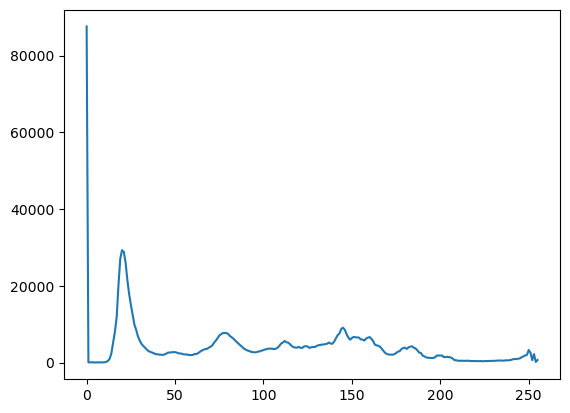

sites/cooma/IMG_6421.JPG


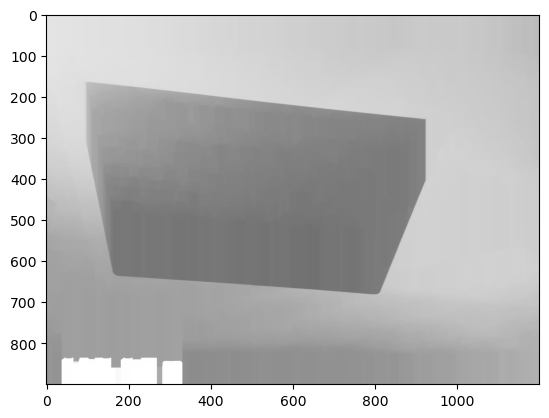

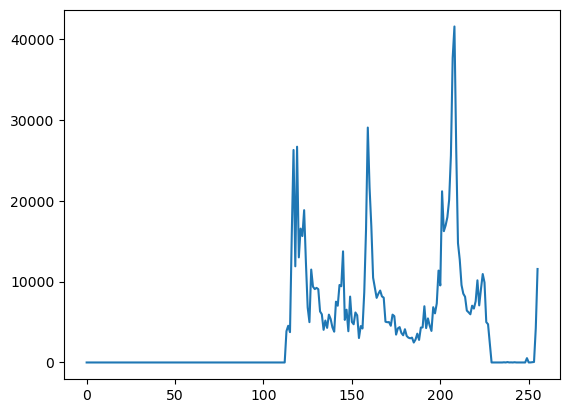

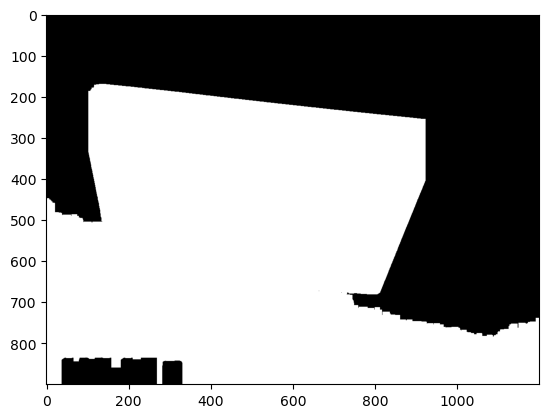

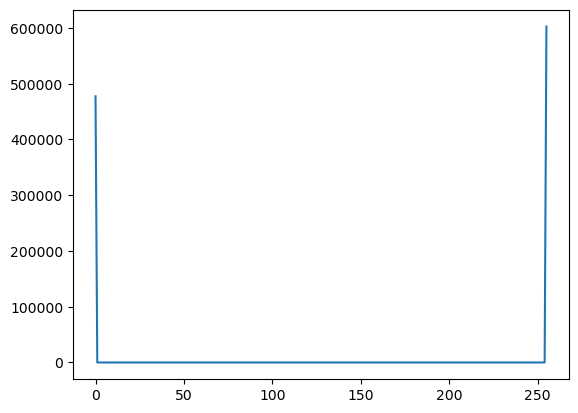

-1
0


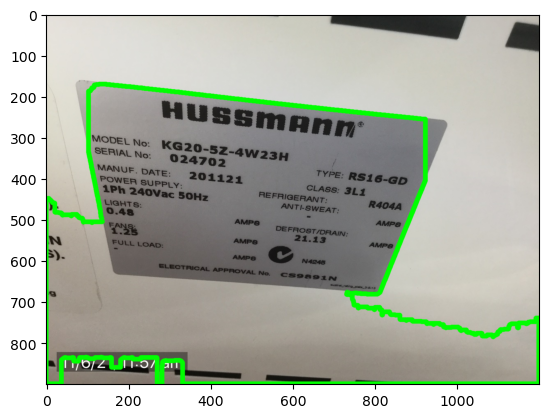

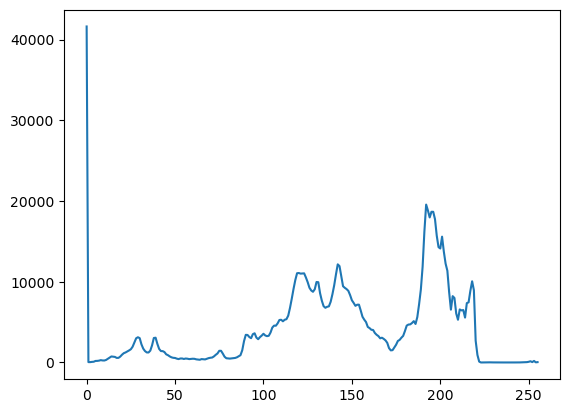

sites/cooma/IMG_6422.JPG


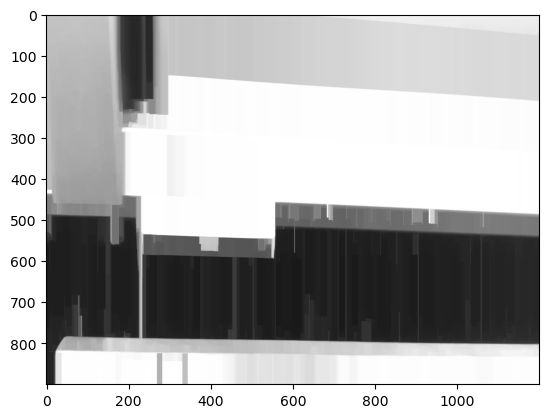

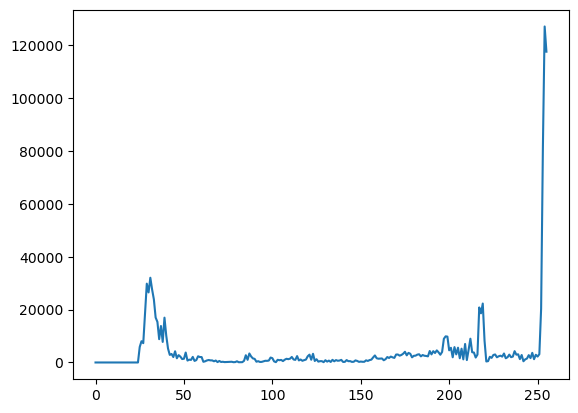

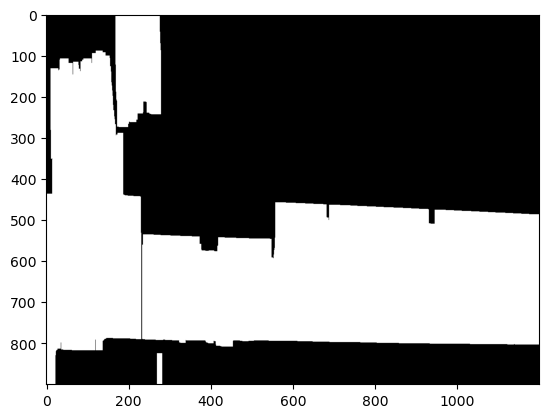

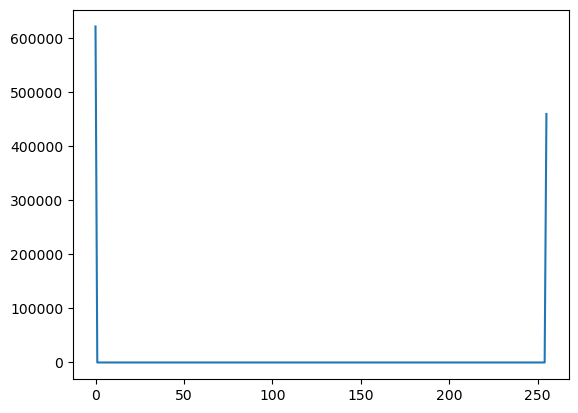

-1
0
-1
1
-1
2
-1
3


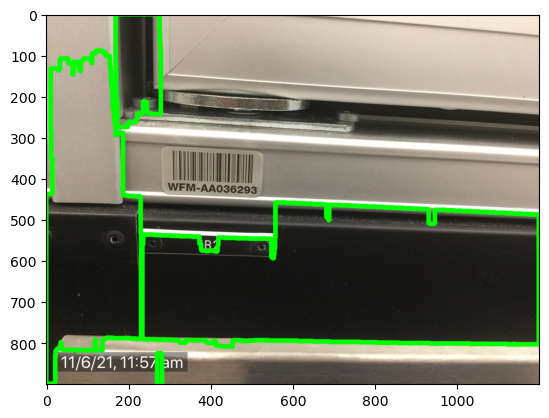

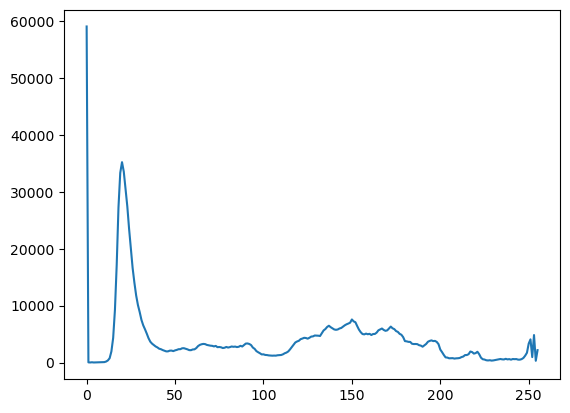

sites/cooma/IMG_6423.JPG


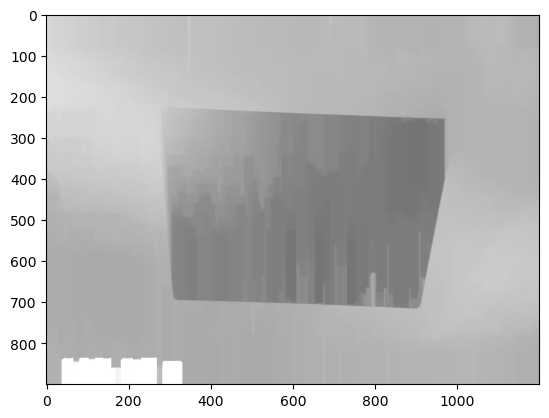

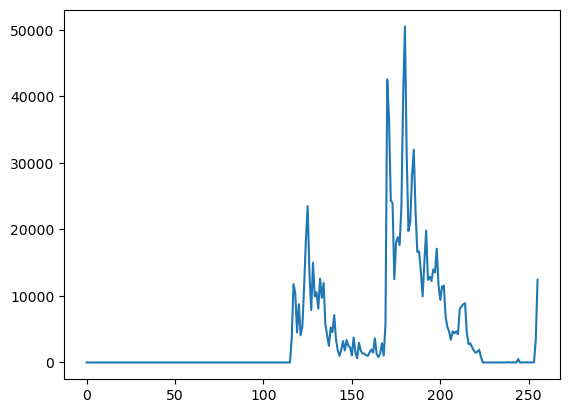

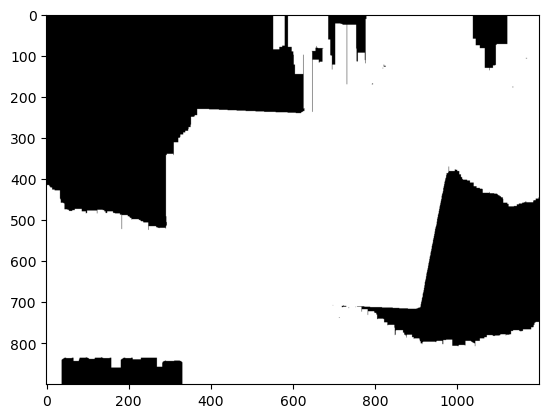

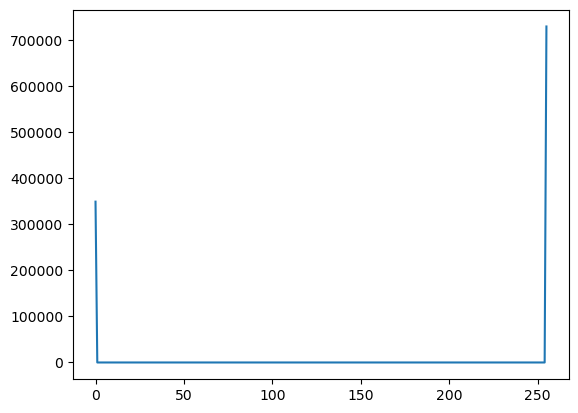

-1
0
-1
1


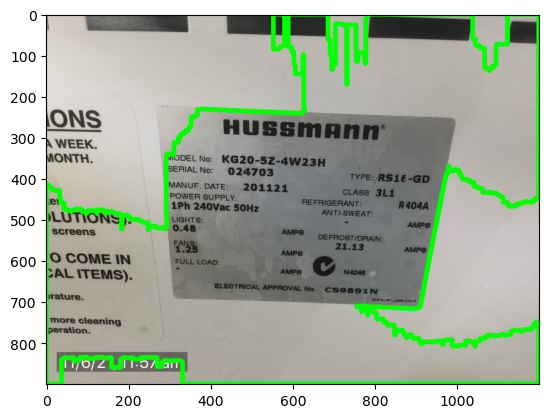

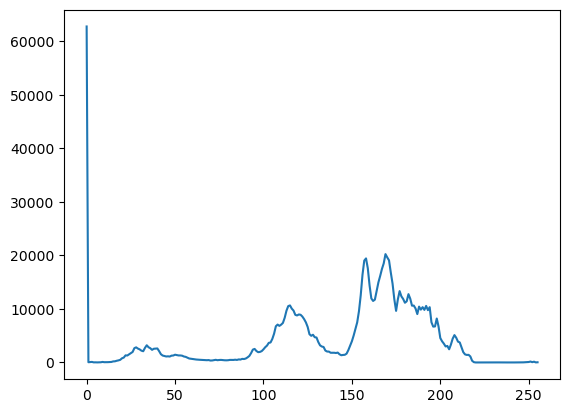

sites/cooma/IMG_6441.JPG


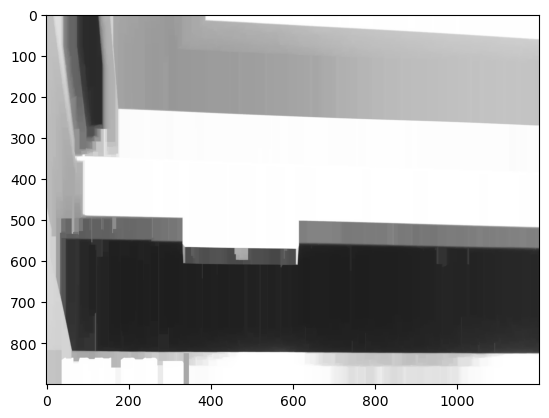

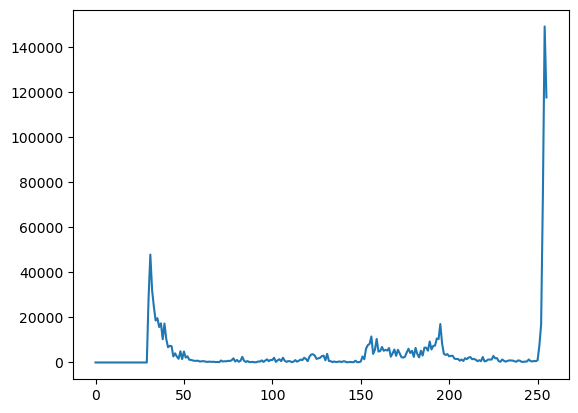

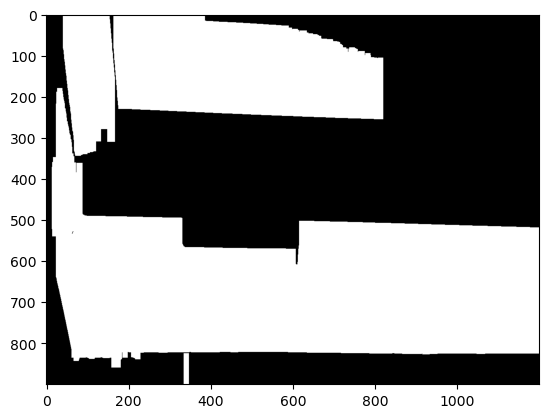

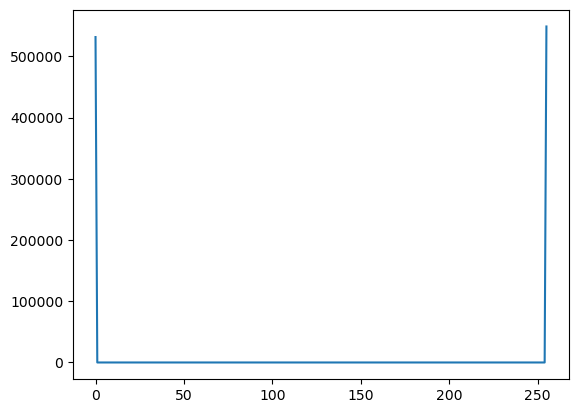

-1
0
-1
1
-1
2
-1
3


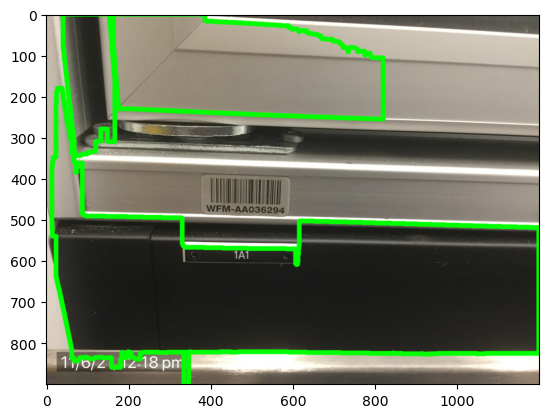

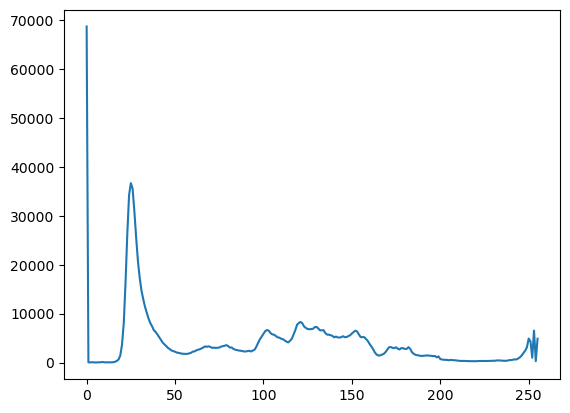

sites/cooma/IMG_6442.JPG


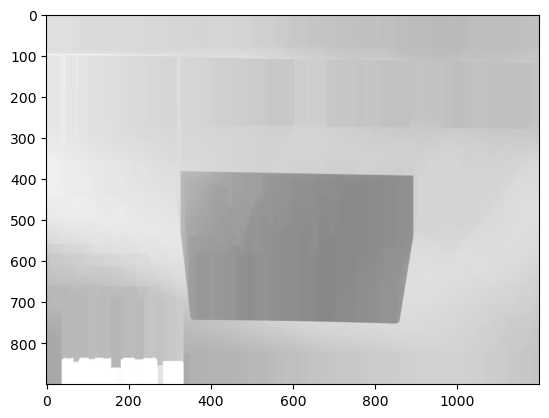

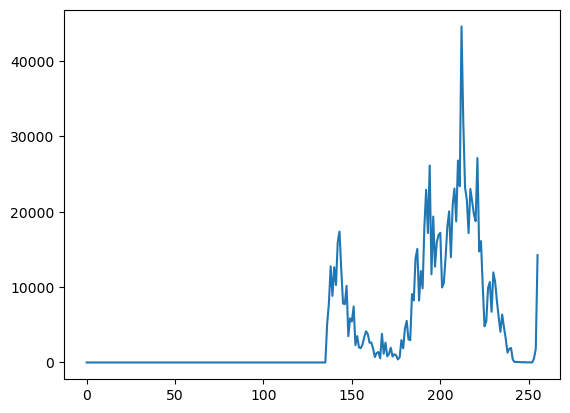

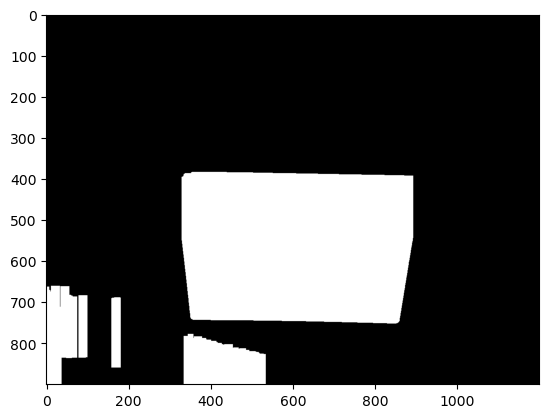

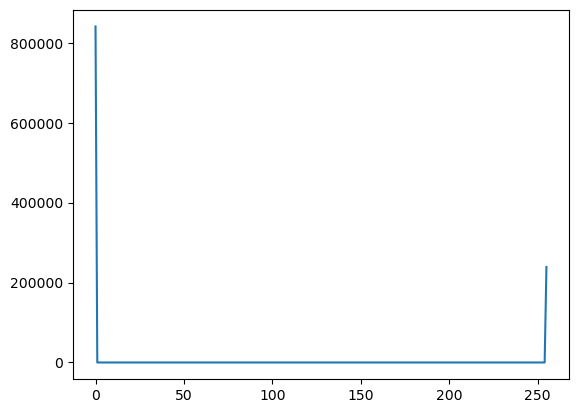

-1
0
-1
1
-1
2
-1
3
-1
4


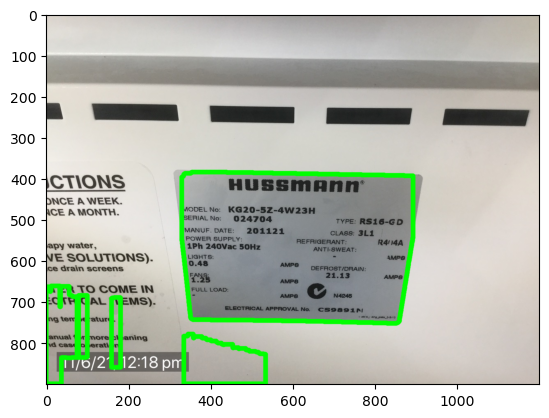

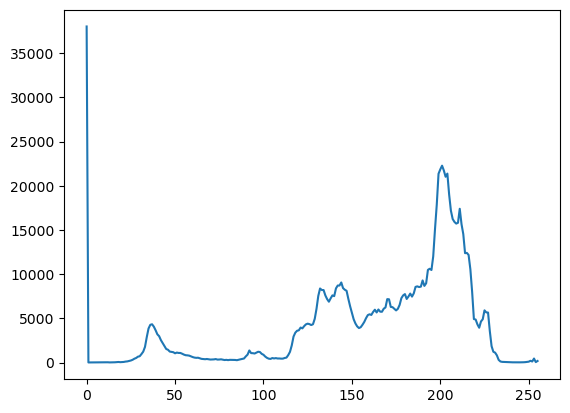

sites/cooma/IMG_6444.JPG


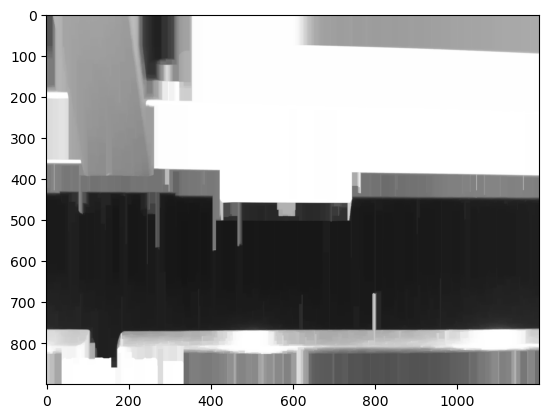

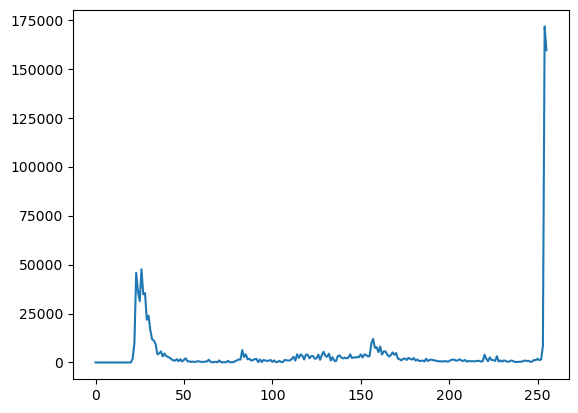

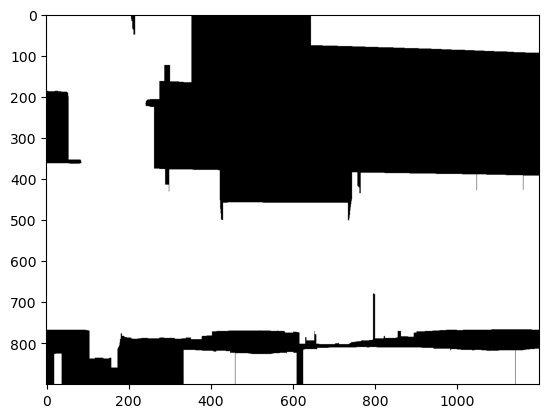

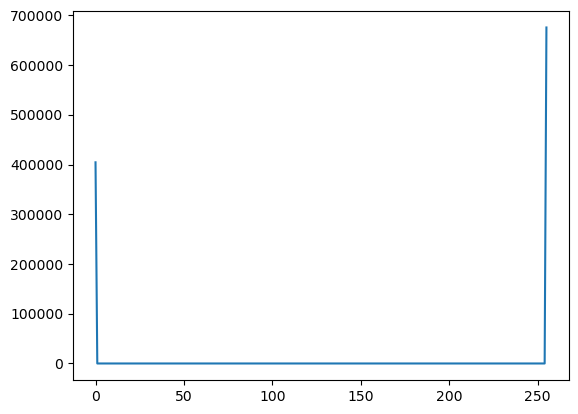

-1
0
-1
1
-1
2
-1
3
-1
4
-1
5
-1
6


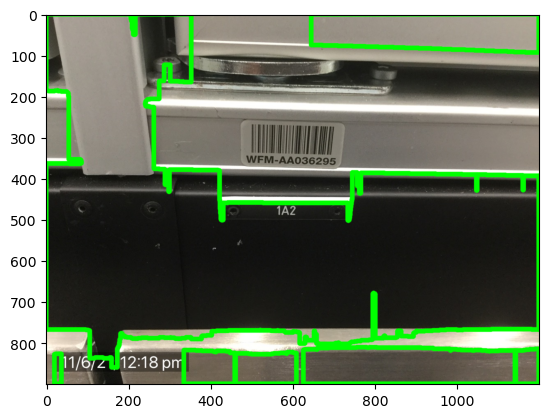

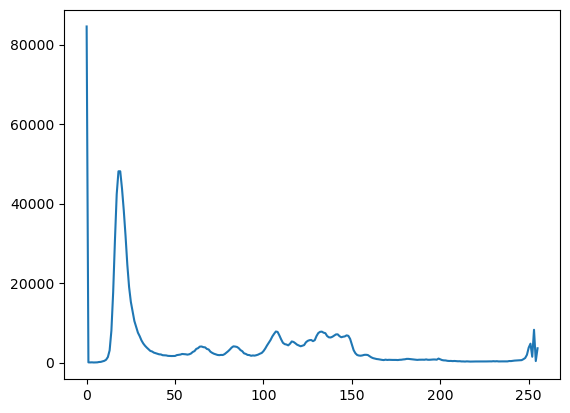

sites/cooma/IMG_6445.JPG


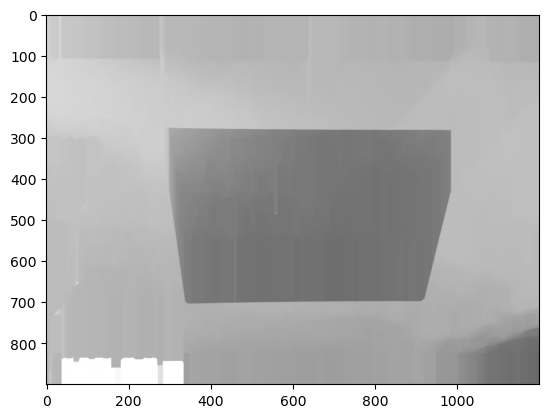

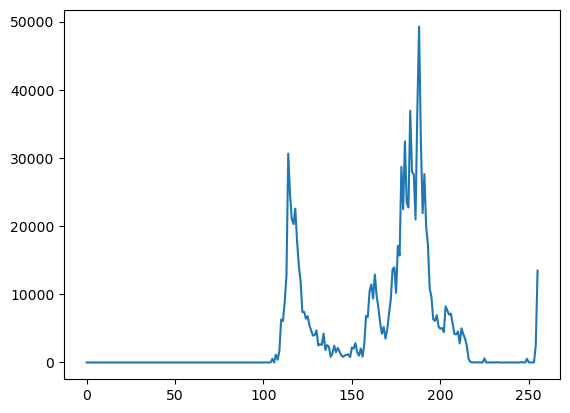

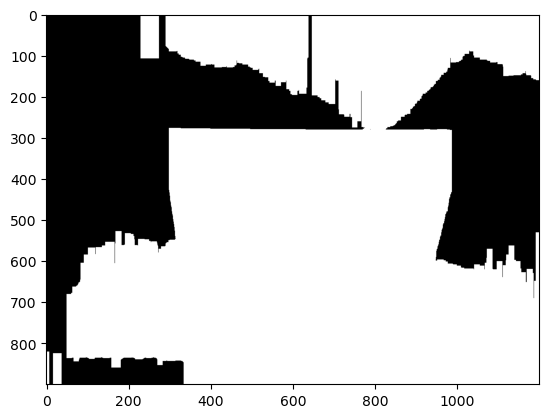

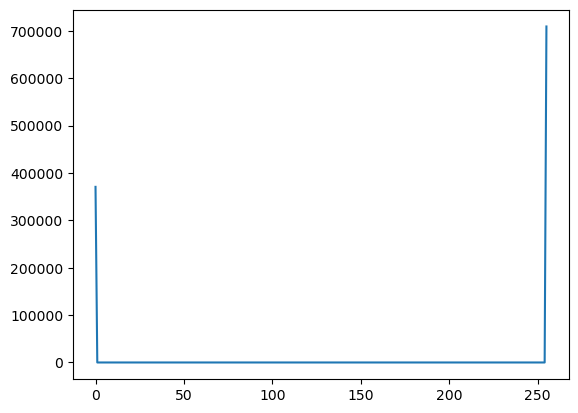

-1
0
-1
1
-1
2
-1
3
-1
4


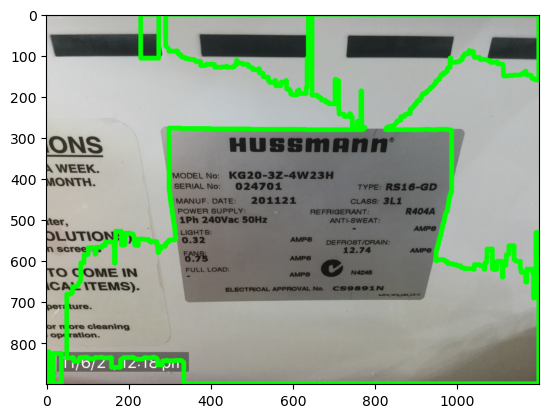

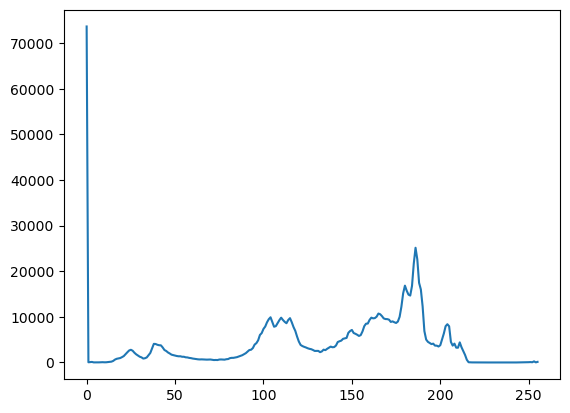

sites/cooma/IMG_6448.JPG


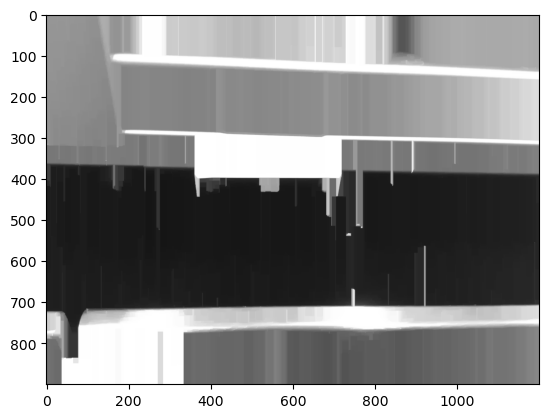

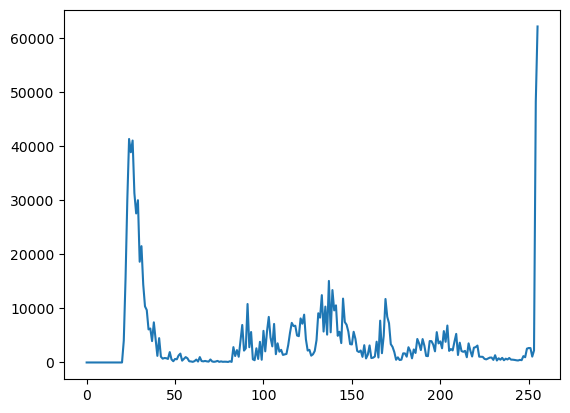

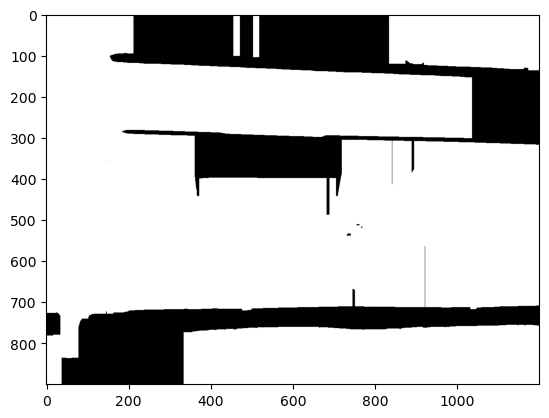

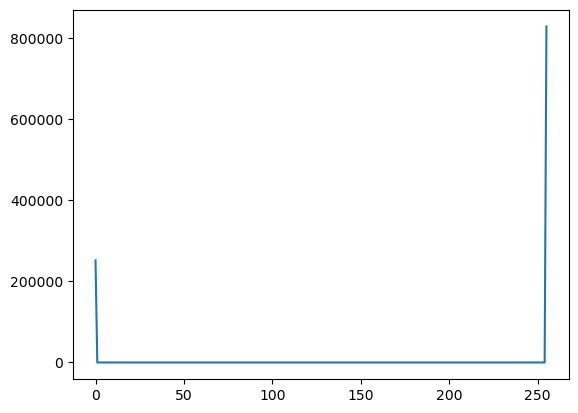

-1
0
-1
1
-1
2
-1
3
-1
4


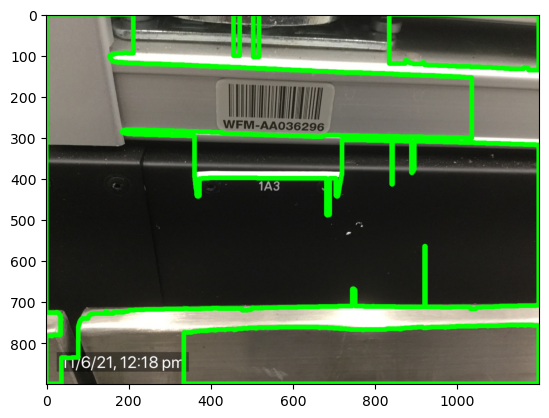

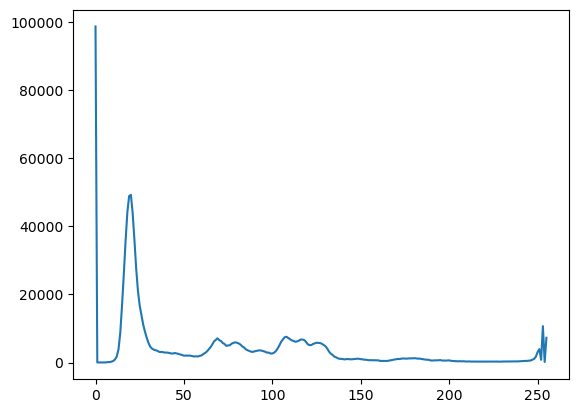

sites/cooma/IMG_6449.JPG


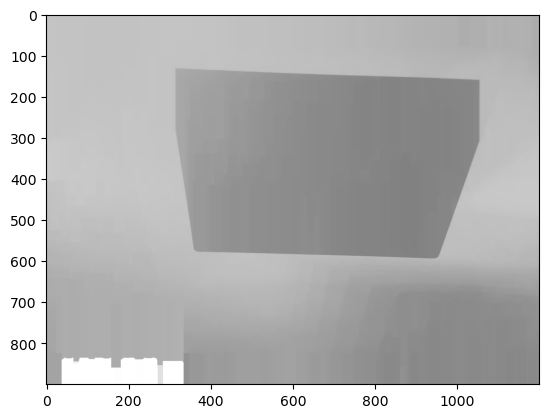

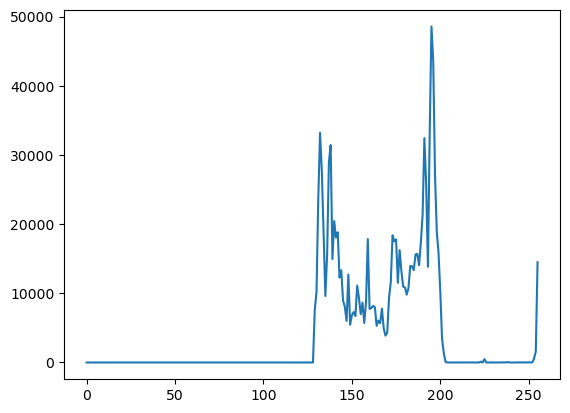

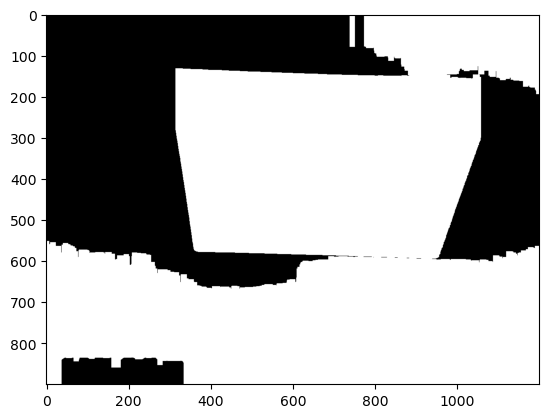

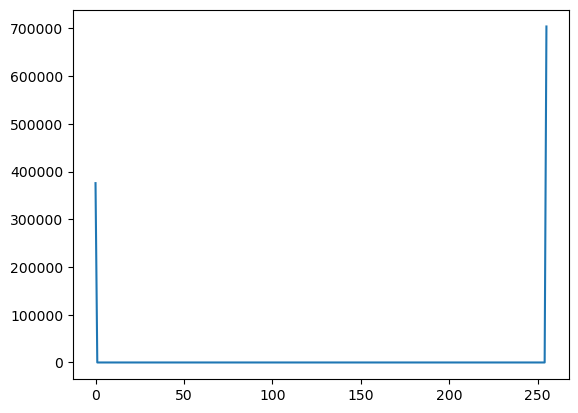

-1
0
-1
1


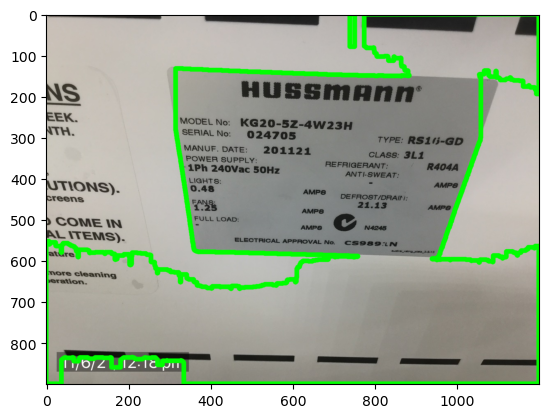

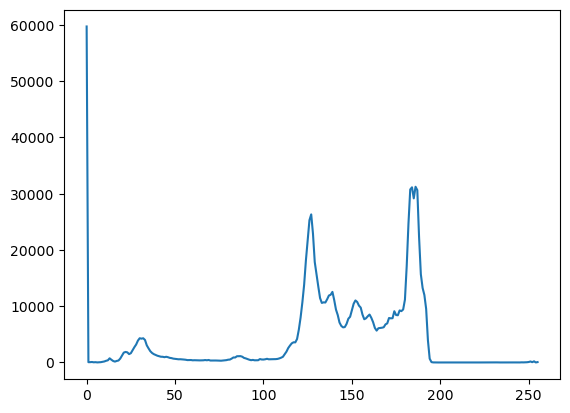

sites/cooma/IMG_6451.JPG


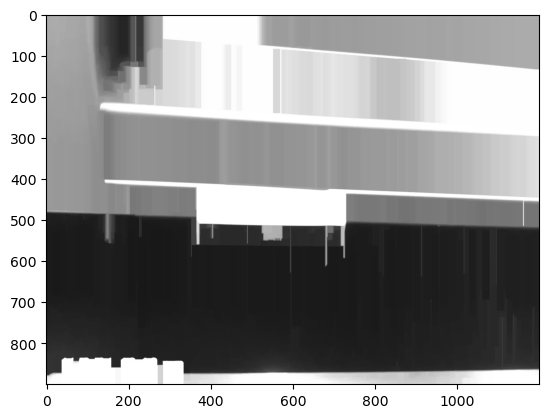

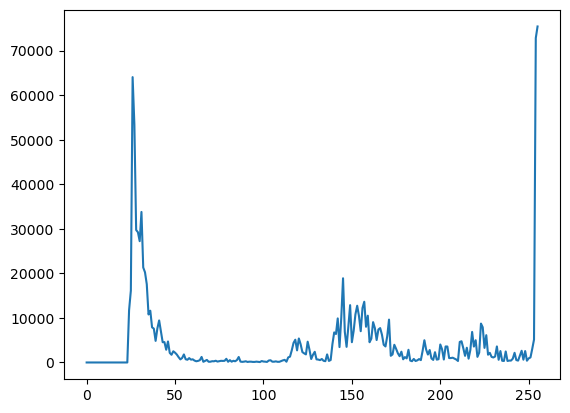

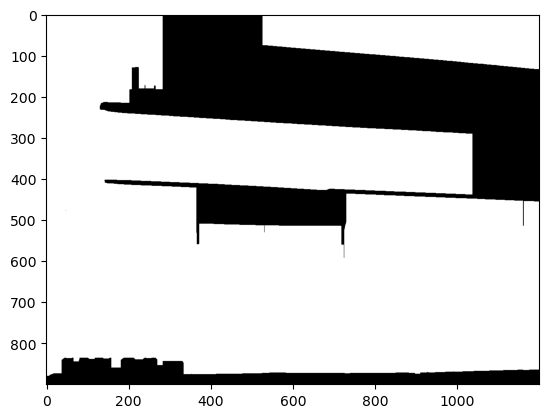

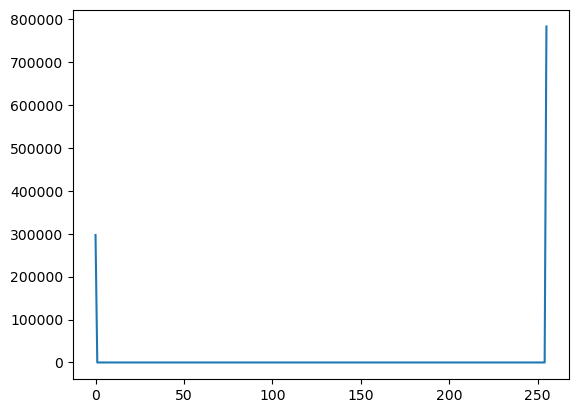

-1
0
-1
1


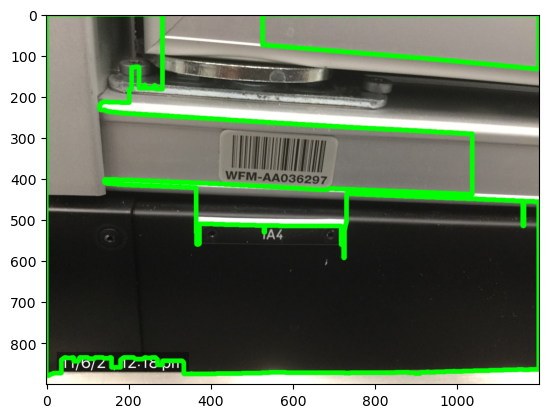

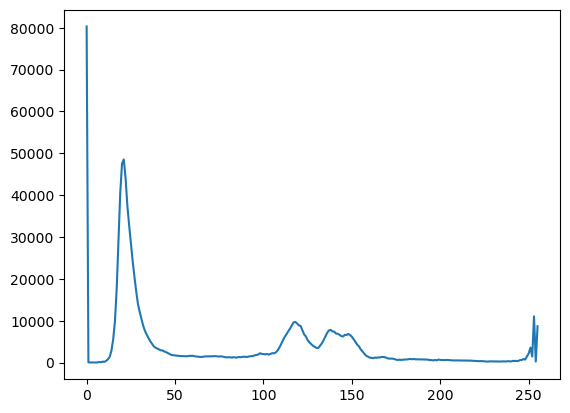

sites/cooma/IMG_6452.JPG


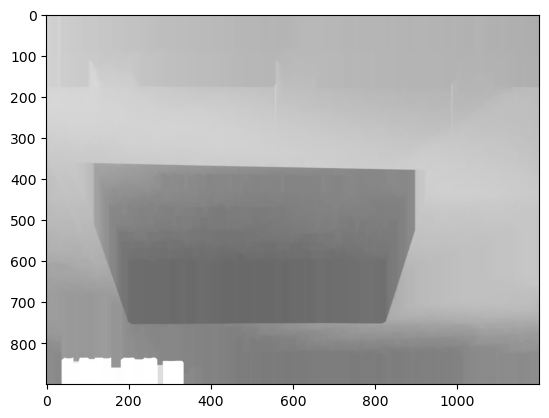

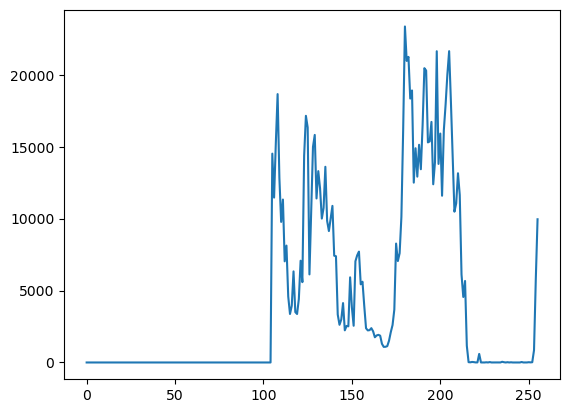

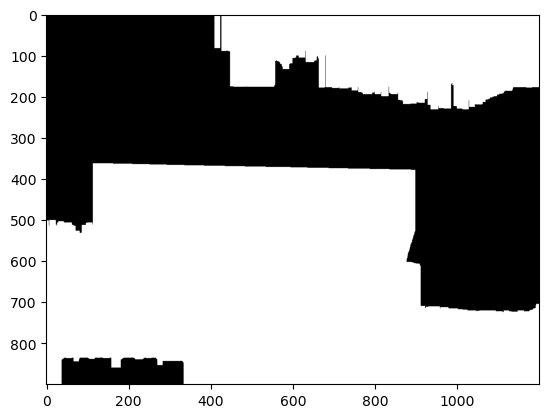

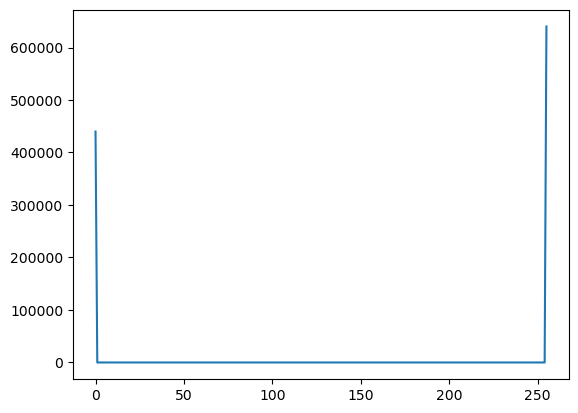

-1
0
-1
1
-1
2


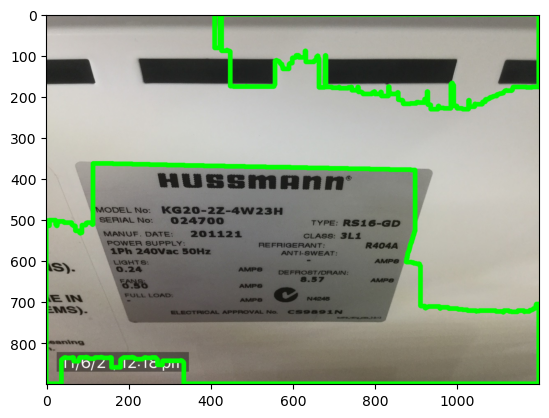

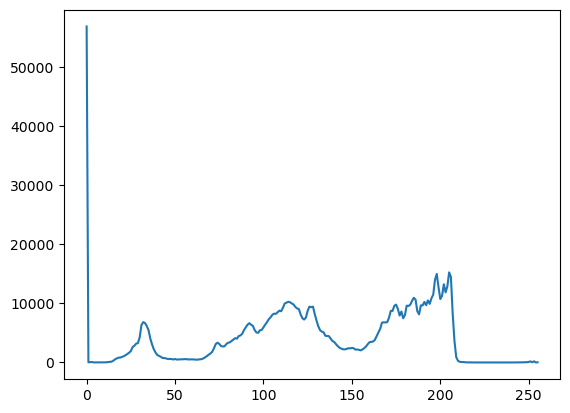

In [492]:
dir = r"sites/cooma/"
for item in os.listdir(dir):
    itemPath = dir + item
    print(itemPath)
    try:
        img = Image.open(itemPath)
        analyseImg(detectNameplate(itemPath))
    except IOError:
       print("Not image: ", itemPath)